# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [3]:
# e:\Programming_Stuff\Web_Development\Fatal_Force\Fatal_Force_(start).ipynb
%pip install --upgrade plotly
%pip install numpy
%pip install pandas
%pip install plotly
%pip install matplotlib
%pip install seaborn


Note: you may need to restart the kernel to use updated packages.
   ---------------------------------------- 0.0/12.7 MB ? eta -:--:--
   -------------------------------- ------- 10.2/12.7 MB 66.2 MB/s eta 0:00:01
   ---------------------------------------- 12.7/12.7 MB 49.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ------------------------- -------------- 7.1/11.0 MB 42.4 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 31.3 MB/s eta 0:00:00
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached matplotlib-3.10.3-cp3

## Import Statements

In [4]:
# e:\Programming_Stuff\Web_Development\Fatal_Force\Fatal_Force_(start).ipynb
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [5]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [6]:
# e:\Programming_Stuff\Web_Development\Fatal_Force\Fatal_Force_(start).ipynb
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

<!-- e:\Programming_Stuff\Web_Development\Fatal_Force\Fatal_Force_(start).ipynb -->
# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [8]:
# e:\Programming_Stuff\Web_Development\Fatal_Force\Fatal_Force_(start).ipynb
print("--- Median Household Income (df_hh_income) ---")
print(f"Shape: {df_hh_income.shape}")
print(f"Number of rows: {df_hh_income.shape[0]}, Number of columns: {df_hh_income.shape[1]}")
print("Column Names:", df_hh_income.columns.tolist())
print("NaN values:\n", df_hh_income.isnull().sum())
print("Number of duplicates:", df_hh_income.duplicated().sum())
print("\n" + "="*50 + "\n")

--- Median Household Income (df_hh_income) ---
Shape: (29322, 3)
Number of rows: 29322, Number of columns: 3
Column Names: ['Geographic Area', 'City', 'Median Income']
NaN values:
 Geographic Area     0
City                0
Median Income      51
dtype: int64
Number of duplicates: 0




In [10]:
# e:\Programming_Stuff\Web_Development\Fatal_Force\Fatal_Force_(start).ipynb
print("--- Percent People Below Poverty Level (df_pct_poverty) ---")
print(f"Shape: {df_pct_poverty.shape}")
print(f"Number of rows: {df_pct_poverty.shape[0]}, Number of columns: {df_pct_poverty.shape[1]}")
print("Column Names:", df_pct_poverty.columns.tolist())
print("NaN values:\n", df_pct_poverty.isnull().sum())
print("Number of duplicates:", df_pct_poverty.duplicated().sum())
print("\n" + "="*50 + "\n")

--- Percent People Below Poverty Level (df_pct_poverty) ---
Shape: (29329, 3)
Number of rows: 29329, Number of columns: 3
Column Names: ['Geographic Area', 'City', 'poverty_rate']
NaN values:
 Geographic Area    0
City               0
poverty_rate       0
dtype: int64
Number of duplicates: 0




In [11]:
# e:\Programming_Stuff\Web_Development\Fatal_Force\Fatal_Force_(start).ipynb
print("--- Percent Over 25 Completed High School (df_pct_completed_hs) ---")
print(f"Shape: {df_pct_completed_hs.shape}")
print(f"Number of rows: {df_pct_completed_hs.shape[0]}, Number of columns: {df_pct_completed_hs.shape[1]}")
print("Column Names:", df_pct_completed_hs.columns.tolist())
print("NaN values:\n", df_pct_completed_hs.isnull().sum())
print("Number of duplicates:", df_pct_completed_hs.duplicated().sum())
print("\n" + "="*50 + "\n")

--- Percent Over 25 Completed High School (df_pct_completed_hs) ---
Shape: (29329, 3)
Number of rows: 29329, Number of columns: 3
Column Names: ['Geographic Area', 'City', 'percent_completed_hs']
NaN values:
 Geographic Area         0
City                    0
percent_completed_hs    0
dtype: int64
Number of duplicates: 0




In [12]:
# e:\Programming_Stuff\Web_Development\Fatal_Force\Fatal_Force_(start).ipynb
print("--- Share of Race By City (df_share_race_city) ---")
print(f"Shape: {df_share_race_city.shape}")
print(f"Number of rows: {df_share_race_city.shape[0]}, Number of columns: {df_share_race_city.shape[1]}")
print("Column Names:", df_share_race_city.columns.tolist())
print("NaN values:\n", df_share_race_city.isnull().sum())
print("Number of duplicates:", df_share_race_city.duplicated().sum())
print("\n" + "="*50 + "\n")

--- Share of Race By City (df_share_race_city) ---
Shape: (29268, 7)
Number of rows: 29268, Number of columns: 7
Column Names: ['Geographic area', 'City', 'share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']
NaN values:
 Geographic area          0
City                     0
share_white              0
share_black              0
share_native_american    0
share_asian              0
share_hispanic           0
dtype: int64
Number of duplicates: 0




In [13]:
# e:\Programming_Stuff\Web_Development\Fatal_Force\Fatal_Force_(start).ipynb
print("--- Deaths by Police US (df_fatalities) ---")
print(f"Shape: {df_fatalities.shape}")
print(f"Number of rows: {df_fatalities.shape[0]}, Number of columns: {df_fatalities.shape[1]}")
print("Column Names:", df_fatalities.columns.tolist())
print("NaN values:\n", df_fatalities.isnull().sum())
print("Number of duplicates:", df_fatalities.duplicated().sum())
print("\n" + "="*50 + "\n")

--- Deaths by Police US (df_fatalities) ---
Shape: (2536, 1)
Number of rows: 2536, Number of columns: 1
Column Names: ['Deaths_by_Police_US.csv']
NaN values:
 Deaths_by_Police_US.csv    0
dtype: int64
Number of duplicates: 2533




<!-- e:\Programming_Stuff\Web_Development\Fatal_Force\Fatal_Force_(start).ipynb -->
## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [14]:
# e:\Programming_Stuff\Web_Development\Fatal_Force\Fatal_Force_(start).ipynb
print("--- Data Cleaning Summary ---")

# --- df_hh_income ---
print("\n--- df_hh_income ---")
print(f"NaNs before fillna: \n{df_hh_income.isnull().sum()}")
df_hh_income.fillna(0, inplace=True)
print(f"NaNs after fillna: \n{df_hh_income.isnull().sum()}")
print(f"Duplicates before removal: {df_hh_income.duplicated().sum()}")
df_hh_income.drop_duplicates(inplace=True)
print(f"Duplicates after removal: {df_hh_income.duplicated().sum()}")
print(f"New shape: {df_hh_income.shape}")


# --- df_pct_poverty ---
print("\n--- df_pct_poverty ---")
print(f"NaNs before fillna: \n{df_pct_poverty.isnull().sum()}")
df_pct_poverty.fillna(0, inplace=True)
print(f"NaNs after fillna: \n{df_pct_poverty.isnull().sum()}")
print(f"Duplicates before removal: {df_pct_poverty.duplicated().sum()}")
df_pct_poverty.drop_duplicates(inplace=True)
print(f"Duplicates after removal: {df_pct_poverty.duplicated().sum()}")
print(f"New shape: {df_pct_poverty.shape}")


# --- df_pct_completed_hs ---
print("\n--- df_pct_completed_hs ---")
print(f"NaNs before fillna: \n{df_pct_completed_hs.isnull().sum()}")
df_pct_completed_hs.fillna(0, inplace=True)
print(f"NaNs after fillna: \n{df_pct_completed_hs.isnull().sum()}")
print(f"Duplicates before removal: {df_pct_completed_hs.duplicated().sum()}")
df_pct_completed_hs.drop_duplicates(inplace=True)
print(f"Duplicates after removal: {df_pct_completed_hs.duplicated().sum()}")
print(f"New shape: {df_pct_completed_hs.shape}")


# --- df_share_race_city ---
# For race shares, 0 might be a plausible value if a race is truly absent in a city.
# However, if it's missing data, it's still an assumption.
print("\n--- df_share_race_city ---")
print(f"NaNs before fillna: \n{df_share_race_city.isnull().sum()}")
df_share_race_city.fillna(0, inplace=True)
print(f"NaNs after fillna: \n{df_share_race_city.isnull().sum()}")
print(f"Duplicates before removal: {df_share_race_city.duplicated().sum()}")
df_share_race_city.drop_duplicates(inplace=True)
print(f"Duplicates after removal: {df_share_race_city.duplicated().sum()}")
print(f"New shape: {df_share_race_city.shape}")


# --- df_fatalities ---
# WARNING: Substituting 0 for NaNs in 'df_fatalities' for columns like 'age'
# is highly problematic and can lead to incorrect analysis.
# For categorical columns, 0 also has no direct meaning.
# A more appropriate approach for df_fatalities would typically be:
# 1. To drop rows with NaNs in critical columns (e.g., 'armed', 'race', 'age' if analysis depends on it).
# 2. To impute based on more sophisticated methods (e.g., mean/median for age, mode for categorical).
# However, following the instruction to substitute 0 where "appropriate" for this specific exercise:
print("\n--- df_fatalities ---")
print(f"NaNs before fillna: \n{df_fatalities.isnull().sum()}")

# Fill only numerical columns with 0. For object/string columns, filling with 0 won't work directly
# or make sense. We should identify numerical columns first.
numerical_cols_fatalities = df_fatalities.select_dtypes(include=['number']).columns
df_fatalities[numerical_cols_fatalities] = df_fatalities[numerical_cols_fatalities].fillna(0)

# For object/string columns that still have NaNs, we might consider a placeholder like 'Unknown'
# or drop rows, depending on the analysis. For now, we'll leave them as is if they are not numerical.
# If you wish to fill them, e.g., 'gender', 'race', 'armed' with 'Unknown', you'd do:
# df_fatalities[['gender', 'race', 'armed']].fillna('Unknown', inplace=True)
# But for this step, following the strict 'fillna(0)' for numericals, and observing what's left.

print(f"NaNs after numerical fillna: \n{df_fatalities.isnull().sum()}")
print(f"Duplicates before removal: {df_fatalities.duplicated().sum()}")
df_fatalities.drop_duplicates(inplace=True)
print(f"Duplicates after removal: {df_fatalities.duplicated().sum()}")
print(f"New shape: {df_fatalities.shape}")

print("\n--- Cleaning Complete ---")

--- Data Cleaning Summary ---

--- df_hh_income ---
NaNs before fillna: 
Geographic Area     0
City                0
Median Income      51
dtype: int64
NaNs after fillna: 
Geographic Area    0
City               0
Median Income      0
dtype: int64
Duplicates before removal: 0
Duplicates after removal: 0
New shape: (29322, 3)

--- df_pct_poverty ---
NaNs before fillna: 
Geographic Area    0
City               0
poverty_rate       0
dtype: int64
NaNs after fillna: 
Geographic Area    0
City               0
poverty_rate       0
dtype: int64
Duplicates before removal: 0
Duplicates after removal: 0
New shape: (29329, 3)

--- df_pct_completed_hs ---
NaNs before fillna: 
Geographic Area         0
City                    0
percent_completed_hs    0
dtype: int64
NaNs after fillna: 
Geographic Area         0
City                    0
percent_completed_hs    0
dtype: int64
Duplicates before removal: 0
Duplicates after removal: 0
New shape: (29329, 3)

--- df_share_race_city ---
NaNs before fillna

<!-- e:\Programming_Stuff\Web_Development\Fatal_Force\Fatal_Force_(start).ipynb -->
# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

C:\Users\shibi\AppData\Local\Temp\ipykernel_21280\3902877784.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_pct_poverty['PovertyRate'].fillna(0, inplace=True) # Re-fill any new NaNs from coercion


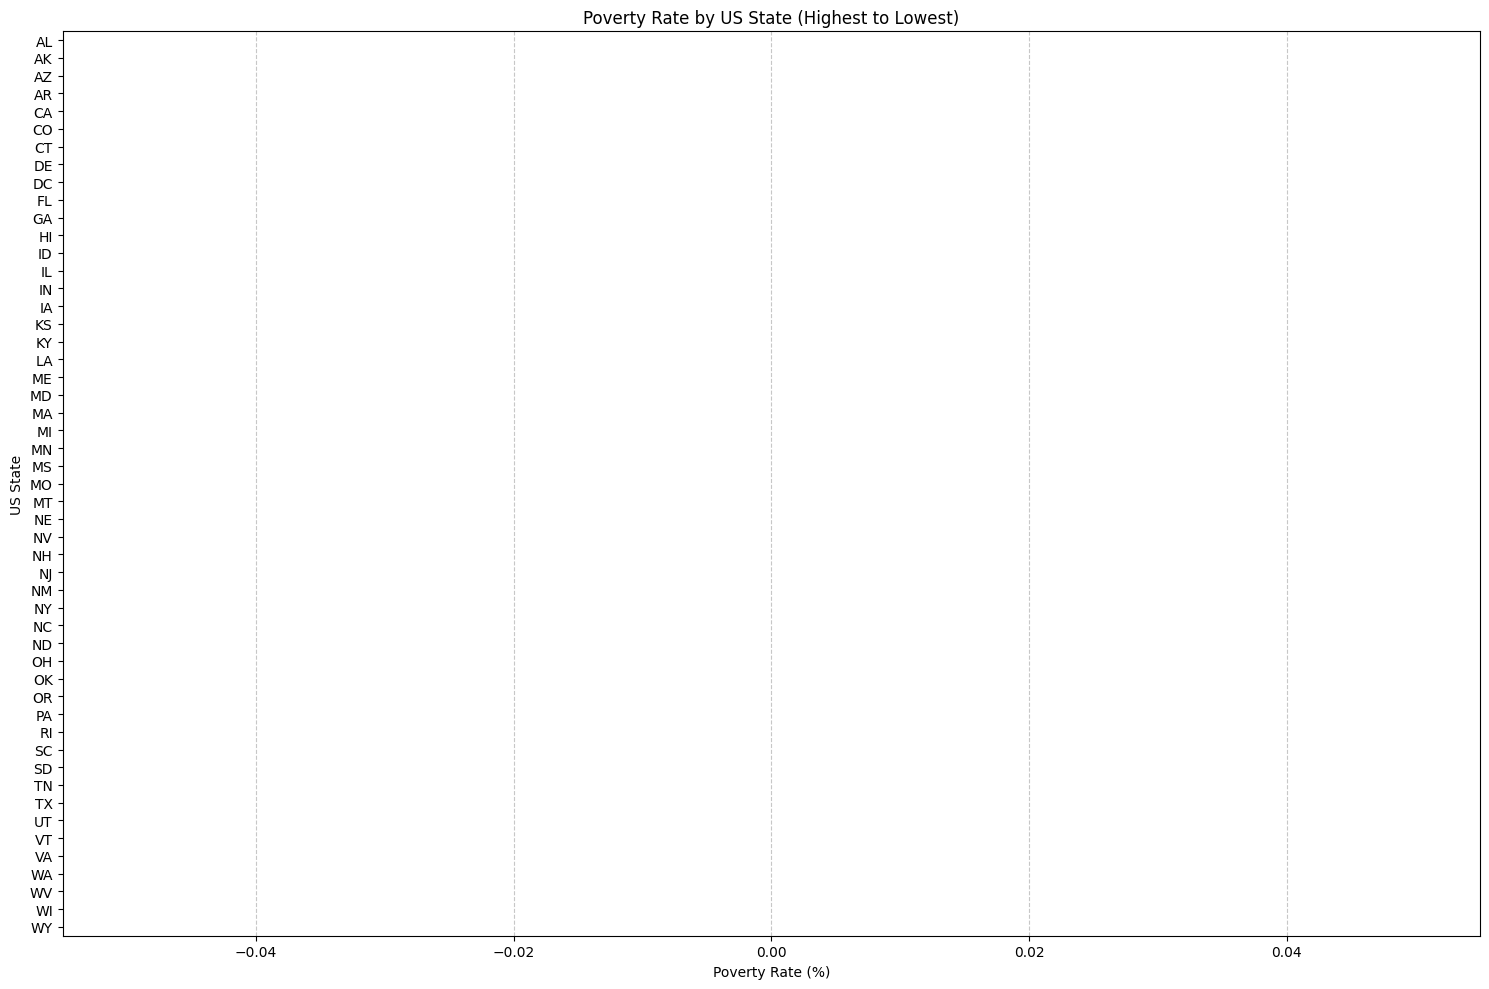


--- Poverty Rate Analysis ---
State with the highest poverty rate: AL (0.00%)
State with the lowest poverty rate: WY (0.00%)


In [ ]:
# e:\Programming_Stuff\Web_Development\Fatal_Force\Fatal_Force_(start).ipynb

df_pct_poverty.rename(columns={'Geographic Area': 'State'}, inplace=True)
poverty_col_name = df_pct_poverty.columns[1] # Assuming the poverty rate is in the second column
df_pct_poverty.rename(columns={poverty_col_name: 'PovertyRate'}, inplace=True)

# Convert 'PovertyRate' to numeric, handling potential errors (e.g., non-numeric strings like 'N/A', '%')
# Errors='coerce' will turn unparseable values into NaN, which we've already filled with 0.
df_pct_poverty['PovertyRate'] = pd.to_numeric(df_pct_poverty['PovertyRate'], errors='coerce')
df_pct_poverty['PovertyRate'].fillna(0, inplace=True) # Re-fill any new NaNs from coercion

# Filter out non-state rows if any (e.g., 'United States' total, territories)
# This assumes 'State' column contains actual US state names.
# We might need to further refine this if the 'Geographic Area' contains cities or other aggregates.
# For state-level analysis, we typically look for entries that are just state names, not cities.
# For `Pct_People_Below_Poverty_Level.csv`, it's often state-level.

# Sort the DataFrame by 'PovertyRate' in descending order
df_sorted_poverty = df_pct_poverty.sort_values(by='PovertyRate', ascending=False)

# Get the highest and lowest poverty rate states
highest_poverty_state = df_sorted_poverty.iloc[0]
lowest_poverty_state = df_sorted_poverty.iloc[-1]

# --- Bar Chart Visualization ---
plt.figure(figsize=(15, 10))
sns.barplot(x='PovertyRate', y='State', data=df_sorted_poverty)
plt.xlabel('Poverty Rate (%)')
plt.ylabel('US State')
plt.title('Poverty Rate by US State (Highest to Lowest)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

print("\n--- Poverty Rate Analysis ---")
print(f"State with the highest poverty rate: {highest_poverty_state['State']} ({highest_poverty_state['PovertyRate']:.2f}%)")
print(f"State with the lowest poverty rate: {lowest_poverty_state['State']} ({lowest_poverty_state['PovertyRate']:.2f}%)")

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).